In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
! pip install shap -q

     |████████████████████████████████| 575 kB 5.2 MB/s 


In [ ]:
! pip install lime -q

     |████████████████████████████████| 275 kB 5.1 MB/s 


# Multiclass Classification

In [ ]:
df = pd.read_csv('fetal_health.csv')
print(df.shape)
df.head(3)

(2126, 22)


baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  

[3 rows x 22 columns]

In [ ]:
class_names = df.fetal_health.unique()
class_names

array([2., 1., 3.])

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_log = LogisticRegression(random_state=42)
classifier_log.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(classifier_log, x_train)
shap_values = explainer(x_test)

In [ ]:
shap_values.values.shape

(22, 21, 3)

In [ ]:
shap_values.values[0][:2]

array([[ 9.35001975e-02,  1.64956446e-01, -2.58456643e-01],
       [-2.06760274e-07,  1.70113425e-07,  3.66468481e-08]])

In [ ]:
y_pred = classifier_log.predict(x_test)

In [ ]:
y_pred[0]

1.0

In [ ]:
y_pred[1]

1.0

In [ ]:
class_idx = 0

In [ ]:
s = []
for i in shap_values.values:
  f = []
  for j in i:
    f.append(j[class_idx])
  s.append(f)

In [ ]:
len(s[0])

21

In [ ]:
s[0][:2]

[0.1649564458456556, 1.7011342544900305e-07]

In [ ]:
np.array(s[0])

array([ 9.35001975e-02, -2.06760274e-07, -5.44720621e-06, -2.37867208e-07,
        3.87298915e-08, -0.00000000e+00,  2.76317928e-09,  4.27944977e-02,
       -8.43076543e-03,  6.77401475e-01, -3.26631742e-01,  2.30937673e-02,
       -5.12999535e-03,  2.47744984e-02, -5.06390609e-02,  2.59161136e-03,
       -6.88133000e-03, -3.07081338e-02, -1.24825661e-01,  5.81940222e-02,
        3.32026776e-03])

In [ ]:
np.array(s[0])

array([ 1.64956446e-01,  1.70113425e-07,  2.15517396e-06,  1.82055364e-07,
       -2.70208522e-08, -0.00000000e+00, -7.78963783e-10, -2.88523521e-03,
        8.01972526e-03, -3.18897758e-02,  1.59967102e-01, -1.24880126e-02,
        4.48901221e-03, -1.66329165e-02,  6.85994206e-02, -2.45434708e-03,
       -1.50868383e-02, -1.37885990e-01, -2.79112738e-02,  2.88579620e-02,
       -2.09533967e-03])

In [ ]:
np.array(s[0])

array([-2.58456643e-01,  3.66468481e-08,  3.29203225e-06,  5.58118437e-08,
       -1.17090392e-08,  0.00000000e+00, -1.98421549e-09, -3.99092625e-02,
        4.11040166e-04, -6.45511699e-01,  1.66664640e-01, -1.06057547e-02,
        6.40983136e-04, -8.14158193e-03, -1.79603597e-02, -1.37264287e-04,
        2.19681683e-02,  1.68594124e-01,  1.52736934e-01, -8.70519842e-02,
       -1.22492810e-03])

In [ ]:
y_pred

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [ ]:
explainer = shap.Explainer(classifier_log.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
shap_values.shape

(22, 21)

In [ ]:
shap_values.values[0]

array([ 0.01291667,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.05125   , -0.00041667, -0.14458333,
        0.05291667, -0.00916667,  0.00041667, -0.00583333,  0.00916667,
        0.        , -0.0175    , -0.02875   ,  0.00166667, -0.00041667,
        0.00083333])

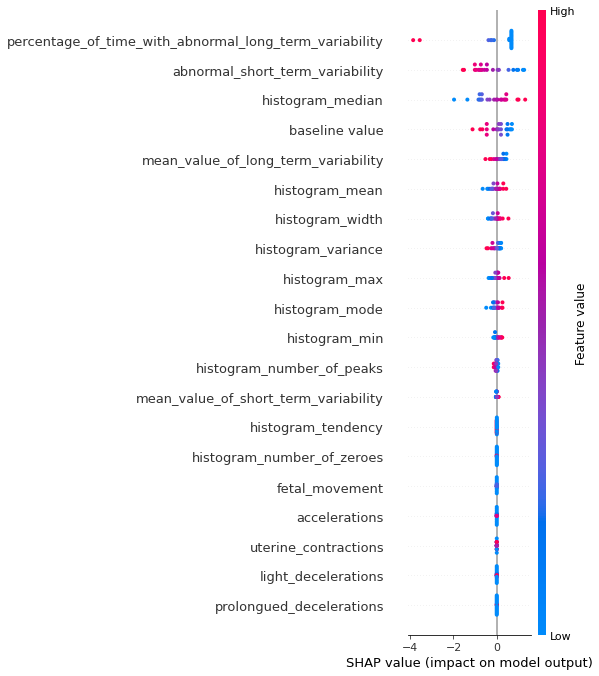

In [ ]:
shap.summary_plot(np.array(s), x_test)

In [ ]:
x_train.shape

(2104, 21)

In [ ]:
np.array(s).shape

(22, 21)

In [ ]:
len(s)

22

In [ ]:
len(s[10])

21

In [ ]:
shap_values.values.shape

(22, 21, 3)

In [ ]:
shap_values.values[10]

array([[ 1.94581492e-01,  3.43287739e-01, -5.37869231e-01],
       [ 1.38370337e-06, -1.13845139e-06, -2.45251983e-07],
       [ 5.90114006e-06, -2.33477179e-06, -3.56636827e-06],
       [ 4.53080397e-08, -3.46772123e-08, -1.06308274e-08],
       [-5.13396236e-08,  3.58183390e-08,  1.55212845e-08],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 2.76317928e-09, -7.78963783e-10, -1.98421549e-09],
       [-4.57400930e-01,  3.08382932e-02,  4.26562637e-01],
       [ 3.77652095e-02, -3.59239748e-02, -1.84123472e-03],
       [ 6.77401475e-01, -3.18897758e-02, -6.45511699e-01],
       [ 4.46282952e-01, -2.18565991e-01, -2.27716961e-01],
       [-6.73336349e-02,  3.64108320e-02,  3.09228029e-02],
       [ 5.73221219e-02, -5.01598321e-02, -7.16228983e-03],
       [ 3.61913179e-02, -2.42978549e-02, -1.18934630e-02],
       [ 8.24356805e-03, -1.11673475e-02,  2.92377948e-03],
       [ 2.59161136e-03, -2.45434708e-03, -1.37264287e-04],
       [-1.00717648e-01, -2.20816452e-01

In [ ]:
classifier_log.predict(x_test)

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [ ]:
classifier_log.predict(x_test)[10]

1.0

In [ ]:
explainer = shap.Explainer(classifier_log.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
explainer = shap.Explainer(classifier_log, x_train)
shap_values = explainer(x_test)

class_idx = 0

s = []
for i in shap_values.values:
  f = []
  for j in i:
    f.append(j[class_idx])
  s.append(f)

In [ ]:
shap_values.values.shape

(22, 21, 3)

In [ ]:
# class 0 
test_instance = 10

shap.initjs()
shap.force_plot(explainer.expected_value[0], np.array(s)[test_instance], x_test.iloc[0,:])

In [ ]:
# class 1
test_instance = 10

shap.initjs()
shap.force_plot(explainer.expected_value[1], np.array(s)[test_instance], x_test.iloc[0,:])

In [ ]:
# class 2
test_instance = 10

shap.initjs()
shap.force_plot(explainer.expected_value[2], np.array(s)[test_instance], x_test.iloc[0,:])

# Classification

In [5]:
df = pd.read_csv('Income.csv')
df = df.iloc[:,1:]
print(df.shape)
df.head(3)

(26048, 9)


age      workclass     education marital_status    occupation   race  \
0   28        Private     Bachelors         Single  White-Collar  White   
1   30  Self-Employed         Assoc        Married  Professional  White   
2   32        Private  Some-college        Married  White-Collar  White   

   gender  hours_per_week  income  
0  Female              60       0  
1    Male              65       1  
2    Male              50       0

In [6]:
class_names = df.income.unique()
class_names

array([0, 1])

In [7]:
categorical_features = [1,2,3,4,5,6]

In [8]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df = df.copy()
categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(df.iloc[:, feature])
    new_df.iloc[:, feature] = le.transform(df.iloc[:, feature])
    categorical_names[feature] = le.classes_

In [9]:
categorical_names

{1: array(['Government', 'Other/Unknown', 'Private', 'Self-Employed'],
       dtype=object),
 2: array(['Assoc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
        'Prof-school', 'School', 'Some-college'], dtype=object),
 3: array(['Divorced', 'Married', 'Separated', 'Single', 'Widowed'],
       dtype=object),
 4: array(['Blue-Collar', 'Other/Unknown', 'Professional', 'Sales', 'Service',
        'White-Collar'], dtype=object),
 5: array(['Other', 'White'], dtype=object),
 6: array(['Female', 'Male'], dtype=object)}

In [10]:
df.head(1)

age workclass  education marital_status    occupation   race  gender  \
0   28   Private  Bachelors         Single  White-Collar  White  Female   

   hours_per_week  income  
0              60       0

In [11]:
df.workclass.unique()

array(['Private', 'Self-Employed', 'Other/Unknown', 'Government'],
      dtype=object)

In [12]:
new_df.head(1)

age  workclass  education  marital_status  occupation  race  gender  \
0   28          2          1               3           5     1       0   

   hours_per_week  income  
0              60       0

In [13]:
new_df.workclass.unique()

array([2, 3, 1, 0])

In [14]:
x = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 42)

In [16]:
row = []
for idx in x_test.index:
  row.append(df[df.index==idx])
x_test_org = pd.concat(row)

In [17]:
x_test.head(1)

age  workclass  education  marital_status  occupation  race  gender  \
7792   32          3          1               1           2     1       0   

      hours_per_week  
7792               8

In [18]:
x_test_org.head(1)

age      workclass  education marital_status    occupation   race  \
7792   32  Self-Employed  Bachelors        Married  Professional  White   

      gender  hours_per_week  income  
7792  Female               8       1

## Models

In [19]:
from sklearn.linear_model import LogisticRegression

classifier_log = LogisticRegression(random_state=42)
classifier_log.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=2)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
import xgboost as xgb

classifier_xgb = xgb.XGBClassifier() 
classifier_xgb.fit(x_train, y_train)

XGBClassifier()

In [26]:
import lightgbm as lgbm

classifier_lgbm = lgbm.LGBMClassifier()
classifier_lgbm.fit(x_train, y_train)

LGBMClassifier()

In [27]:
from tensorflow import keras
from tensorflow.keras import layers 

inputs = keras.Input(shape=x_train.shape[1])
x = layers.Dense(100, activation="relu")(inputs)
x = layers.Dense(50, activation="relu")(x)
outputs = layers.Dense(1, activation="softmax")(x)
classifier_ANN = keras.Model(inputs, outputs)

classifier_ANN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
classifier_ANN.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

In [22]:
import shap
#import lime

In [28]:
model_idx = 0

classifier_list = [classifier_log, classifier_knn, classifier_rf, classifier_xgb, classifier_lgbm, classifier_ANN]
classifier = classifier_list[model_idx]

In [31]:
x_train.shape

(25787, 8)

In [33]:
classifier_log.predict([[0,0,0,0,0,0,0,0]])

array([0])

## Explainer

**Working:** LogisticRegression, KNN, RandomForestClassifier, XGBClassifier, LGBMClassifier

**Not Working:** ANN

In [30]:
classifier

LogisticRegression(random_state=42)

In [ ]:
explainer = shap.Explainer(classifier.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
df.shape

(2126, 22)

In [ ]:
x_test.shape

(22, 21)

In [ ]:
len(shap_values.values)

22

In [ ]:
shap_values.values.shape

(22, 21)

In [ ]:
shap_values.values[0].shape

(21,)

In [ ]:
explainer = shap.Explainer(classifier.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
shap_values.shape

(22, 21)

In [ ]:
shap_values

.values =
array([[ 5.41666667e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.00000000e-02, -1.25000000e-03,
        -1.44166667e-01,  3.70833333e-02, -1.08333333e-02,
         1.25000000e-03, -2.08333333e-03,  4.58333333e-03,
         0.00000000e+00, -5.83333333e-03, -1.87500000e-02,
         2.08333333e-03,  2.50000000e-03,  0.00000000e+00],
       [-1.74166667e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.08333333e-02, -4.58333333e-03,
        -2.42500000e-01, -6.33333333e-02, -2.08333333e-03,
         1.45833333e-02,  4.66666667e-02,  1.66666667e-02,
         0.00000000e+00,  1.62500000e-02, -2.12500000e-02,
         1.24583333e-01,  4.79166667e-02,  4.16666667e-04],
       [-6.25000000e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.08333333e-02, -4

In [ ]:
shap_values[0]

.values =
array([ 0.00541667,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.05      , -0.00125   , -0.14416667,
        0.03708333, -0.01083333,  0.00125   , -0.00208333,  0.00458333,
        0.        , -0.00583333, -0.01875   ,  0.00208333,  0.0025    ,
        0.        ])

.base_values =
1.18

.data =
array([1.33e+02, 2.00e-03, 1.00e-02, 3.00e-03, 2.00e-03, 0.00e+00,
       0.00e+00, 4.60e+01, 1.10e+00, 0.00e+00, 1.54e+01, 6.90e+01,
       9.50e+01, 1.64e+02, 5.00e+00, 0.00e+00, 1.39e+02, 1.35e+02,
       1.38e+02, 9.00e+00, 0.00e+00])

In [ ]:
explainer = shap.Explainer(classifier, x_train)
shap_values = explainer(x_test)

In [ ]:
shap_values.shape

(22, 21, 3)

In [ ]:
shap_values[0][0]

.values =
array([ 0.0935002 ,  0.16495645, -0.25845664])

.base_values =
array([ 2.69185435,  0.62967023, -3.32152458])

.data =
133.0

In [ ]:
len(shap_values[0].values)

21

In [ ]:
shap_values[0].values #1st feature...1st row

array([[ 9.35001975e-02,  1.64956446e-01, -2.58456643e-01],
       [-2.06760274e-07,  1.70113425e-07,  3.66468481e-08],
       [-5.44720621e-06,  2.15517396e-06,  3.29203225e-06],
       [-2.37867208e-07,  1.82055364e-07,  5.58118437e-08],
       [ 3.87298915e-08, -2.70208522e-08, -1.17090392e-08],
       [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [ 2.76317928e-09, -7.78963783e-10, -1.98421549e-09],
       [ 4.27944977e-02, -2.88523521e-03, -3.99092625e-02],
       [-8.43076543e-03,  8.01972526e-03,  4.11040166e-04],
       [ 6.77401475e-01, -3.18897758e-02, -6.45511699e-01],
       [-3.26631742e-01,  1.59967102e-01,  1.66664640e-01],
       [ 2.30937673e-02, -1.24880126e-02, -1.06057547e-02],
       [-5.12999535e-03,  4.48901221e-03,  6.40983136e-04],
       [ 2.47744984e-02, -1.66329165e-02, -8.14158193e-03],
       [-5.06390609e-02,  6.85994206e-02, -1.79603597e-02],
       [ 2.59161136e-03, -2.45434708e-03, -1.37264287e-04],
       [-6.88133000e-03, -1.50868383e-02

In [ ]:
class_idx =0

In [ ]:
s = []
for i in shap_values.values:
  f = []
  for j in i:
    f.append(j[class_idx])
  s.append(f)

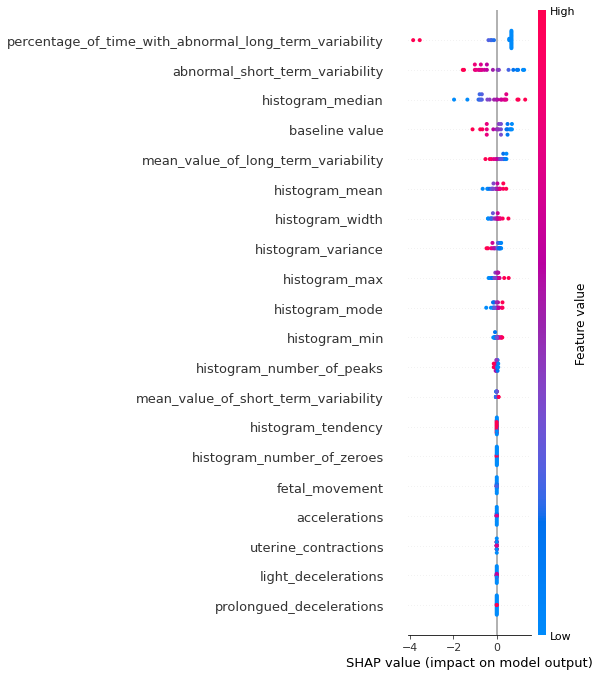

In [ ]:
shap.summary_plot(np.array(s), x_test)

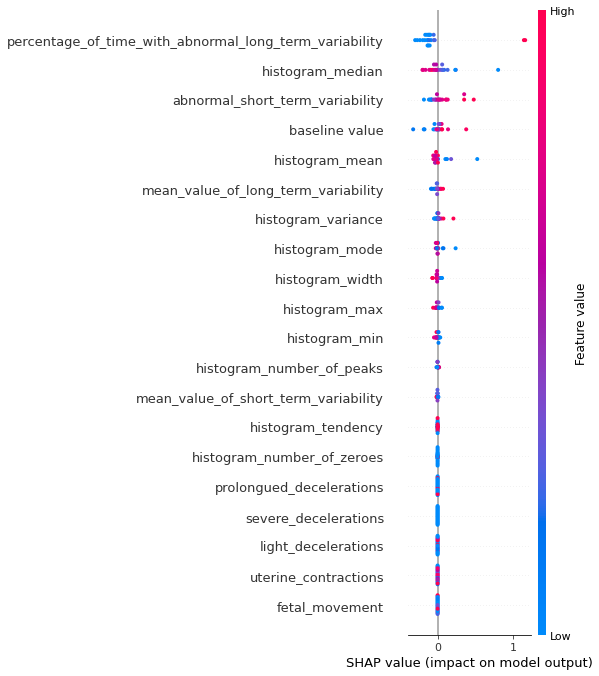

In [ ]:
shap.summary_plot(shap_values)

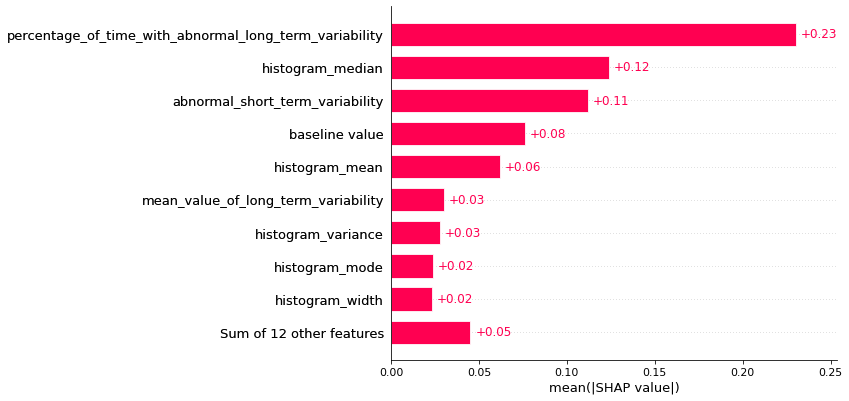

In [ ]:
shap.plots.bar(shap_values)

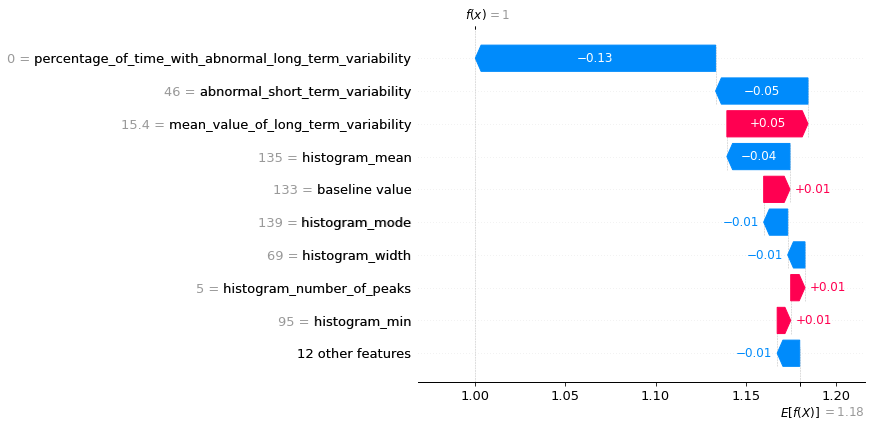

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
explainer = shap.explainers.Exact(classifier.predict_proba, x_train)
shap_values = explainer(x_test)

ValueError: ignored

In [ ]:
shap_values = shap_values[...,1]

In [ ]:
shap_values.values[0]

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
explainer = shap.Explainer(classifier, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values)

## Linear Explainer

**Working:** LogisticRegression

**Not Working:** KNN, RandomForestClassifier, XGBClassifier, LGBMClassifier, ANN

In [ ]:
classifier

In [ ]:
explainer = shap.LinearExplainer(classifier, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

## Kernel Explainer

**Working:** LogisticRegression, KNN, RandomForestClassifier, LGBMClassifier

**Not Working:** XGBClassifier, ANN

In [ ]:
classifier

#### Method-1 (Very Slow - Usable for local Explaination)

https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/kernel_explainer/Iris%20classification%20with%20scikit-learn.html

In [ ]:
explainer = shap.KernelExplainer(classifier.predict_proba, x_train)
shap_values = explainer.shap_values(x_test.iloc[0:3,:])

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values[1], x_test.iloc[0:3,:])

In [ ]:
test_instance = 0

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[1][test_instance], x_test.iloc[0,:])

#### Method-2 (Fast)

https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/kernel_explainer/Census%20income%20classification%20with%20scikit-learn.html

In [ ]:
classifier

In [ ]:
f = lambda x: classifier.predict_proba(x)[:,1]
med = x_train.median().values.reshape((1,x_train.shape[1]))

explainer = shap.KernelExplainer(f, med)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values, x_test)

In [ ]:
test_instance = 0

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[test_instance], x_test.iloc[test_instance, :])

## Kernel Explainer for ANN

#### Method-1 (Very Slow - Usable for local Explaination)

In [ ]:
explainer = shap.KernelExplainer(classifier_ANN.predict, x_train.iloc[:50,:])
shap_values = explainer.shap_values(x_test.iloc[0:10,:])

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values[0], x_test)

In [ ]:
test_instance = 0

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0][test_instance], x_test.iloc[0,:])

#### Method-2 (Fast)

In [ ]:
f = lambda x: classifier_ANN.predict(x)
med = x_train.median().values.reshape((1,x_train.shape[1]))

explainer = shap.KernelExplainer(f, med)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values[0], x_test)

In [ ]:
test_instance = 0

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0][test_instance], x_test.iloc[0,:])

## Tree Explainer

**Working:** XGBClassifier, LGBMClassifier

**Not Working:** KNN, LogisticRegression, RandomForestClassifier, ANN

In [ ]:
classifier

RandomForestClassifier()

### Method-1 (Compatible with all plots)

In [ ]:
explainer = shap.TreeExplainer(classifier, x_train)
shap_values = explainer(x_test)

InvalidModelError: ignored

In [ ]:
shap_values.values.shape

(261, 8, 2)

In [ ]:
shap_values.values[0]

array([[-0.05154385,  0.05154385],
       [ 0.01385558, -0.01385558],
       [-0.06665326,  0.06665326],
       [-0.16299538,  0.16299539],
       [-0.1119845 ,  0.1119845 ],
       [-0.00544731,  0.00544731],
       [ 0.00205444, -0.00205444],
       [ 0.09649158, -0.09649159]])

In [ ]:
class_idx = 0

s = []
for i in shap_values.values:
  f = []
  for j in i:
    f.append(j[class_idx])
  s.append(f)

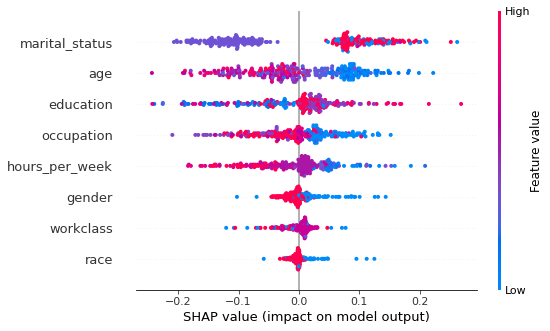

In [ ]:
shap.summary_plot(np.array(s), x_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

### Method-2

In [ ]:
explainer = shap.TreeExplainer(classifier, x_train)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values, x_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_test_org.drop(columns='income').iloc[0,:])

## Deep Explainer

In [ ]:
explainer = shap.DeepExplainer(classifier_ANN, x_train.iloc[:1000,:].values)

In [ ]:
shap_values = explainer.shap_values(x_test[:10].values)

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values[0], x_test[:10])

In [ ]:
shap_values = explainer.shap_values(x_test[:1].values)
shap_values

In [ ]:
shap.summary_plot(shap_values[0], x_test[:1])

In [ ]:
test_instance = 0

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0])

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x_test[0])

## Lime Tabular Explainer

**Working:** LogisticRegression, KNN, RandomForestClassifier, LGBMClassifier

**Not Working:** XGBClassifier, ANN

In [ ]:
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data = np.array(x_train),
    feature_names = x_train.columns,
    mode = 'classification',
    class_names=class_names,
    categorical_features=categorical_features,
    categorical_names=categorical_names,
)

In [ ]:
x_test.iloc[0]

In [ ]:
classifier

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[0], ##new data
    predict_fn=classifier.predict_proba
)

exp.show_in_notebook(show_table=True)

# Regression

In [66]:
df = pd.read_csv('Duplicate_regression_data.csv')
print(df.shape)
df.head(3)

(4606, 18)


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0        1.5         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0        2.5         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0        2.0         1930     11947   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA

In [67]:
df = df.drop(columns=['date', 'street'])
df.head(3)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0        1.5         1340      7912     1.5           0   
1  2384000.0       5.0        2.5         3650      9050     2.0           0   
2   342000.0       3.0        2.0         1930     11947     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   

        city  statezip country  
0  Shoreline  WA 98133     USA  
1    Seattle  WA 98119     USA  
2       Kent  WA 98042     USA

In [68]:
df = df[list(df.columns[1:])+['price']]
df.head(3)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0        1.5         1340      7912     1.5           0     0   
1       5.0        2.5         3650      9050     2.0           0     4   
2       3.0        2.0         1930     11947     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated       city  \
0          3        1340              0      1955          2005  Shoreline   
1          5        3370            280      1921             0    Seattle   
2          4        1930              0      1966             0       Kent   

   statezip country      price  
0  WA 98133     USA   313000.0  
1  WA 98119     USA  2384000.0  
2  WA 98042     USA   342000.0

In [69]:
categorical_features = [12,13,14]

In [70]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df = df.copy()
categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(df.iloc[:, feature])
    new_df.iloc[:, feature] = le.transform(df.iloc[:, feature])
    categorical_names[feature] = le.classes_

In [71]:
categorical_names

{12: array(['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue',
        'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill',
        'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City',
        'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore',
        'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina',
        'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
        'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
        'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
        'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
        'Woodinville', 'Yarrow Point'], dtype=object),
 13: array(['WA 98001', 'WA 98002', 'WA 98003', 'WA 98004', 'WA 98005',
        'WA 98006', 'WA 98007', 'WA 98008', 'WA 98010', 'WA 98011',
        'WA 98014', 'WA 98019', 'WA 98022', 'WA 98023', 'WA 98024',
        'WA 98027', 'WA 98028', 'WA 98029', 'WA 98030', 'WA 98031',
        'WA 98032', 'WA 98033', 'WA 98034',

In [72]:
df.head(2)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0        1.5         1340      7912     1.5           0     0   
1       5.0        2.5         3650      9050     2.0           0     4   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated       city  \
0          3        1340              0      1955          2005  Shoreline   
1          5        3370            280      1921             0    Seattle   

   statezip country      price  
0  WA 98133     USA   313000.0  
1  WA 98119     USA  2384000.0

In [73]:
new_df.head(2)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0        1.5         1340      7912     1.5           0     0   
1       5.0        2.5         3650      9050     2.0           0     4   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  \
0          3        1340              0      1955          2005    36   
1          5        3370            280      1921             0    35   

   statezip  country      price  
0        62        0   313000.0  
1        58        0  2384000.0

In [74]:
x = new_df.iloc[:, :-1]
y = new_df.iloc[:, -1]

In [75]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 42)

In [76]:
row = []
for idx in x_test.index:
  row.append(df[df.index==idx])
x_test_org = pd.concat(row)

### Models

In [174]:
from sklearn.linear_model import LinearRegression

regressor_lin = LinearRegression()
regressor_lin.fit(x_train, y_train)

LinearRegression()

In [175]:
from sklearn.neighbors import KNeighborsRegressor

regressor_knn = KNeighborsRegressor(n_neighbors=2)
regressor_knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [176]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [177]:
x_train.shape

(4559, 15)

In [178]:
regressor_rf.predict([np.zeros(15)])

array([157614.86])

In [179]:
import xgboost

regressor_xgb = xgboost.XGBRegressor().fit(x_train, y_train)

[11:41:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [180]:
import lightgbm as lgbm

regressor_lgbm = lgbm.LGBMRegressor()
regressor_lgbm.fit(x_train, y_train)

LGBMRegressor()

In [181]:
from tensorflow import keras
from tensorflow.keras import layers 

inputs = keras.Input(shape=x_train.shape[1])
x = layers.Dense(100, activation="relu")(inputs)
x = layers.Dense(50, activation="relu")(x)
outputs = layers.Dense(1, activation="linear")(x)
regressor_ANN = keras.Model(inputs, outputs)

regressor_ANN.compile(optimizer="adam", loss="mse", metrics=['mean_squared_error'])
regressor_ANN.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)

In [79]:
import shap
#import lime

In [182]:
model_idx = 2

regressor_list = [regressor_lin, regressor_knn, regressor_rf, regressor_xgb, regressor_lgbm, regressor_ANN]
regressor = regressor_list[model_idx]

### Explainer

**Working:** LinearRegression, KNeighborsRegressor, RandomForestRegressor

**Not Working:** 

In [61]:
regressor = regressor_rf

In [62]:
explainer = shap.Explainer(regressor.predict, x_train)
shap_values = explainer(x_test)

Permutation explainer: 48it [00:48,  1.22s/it]


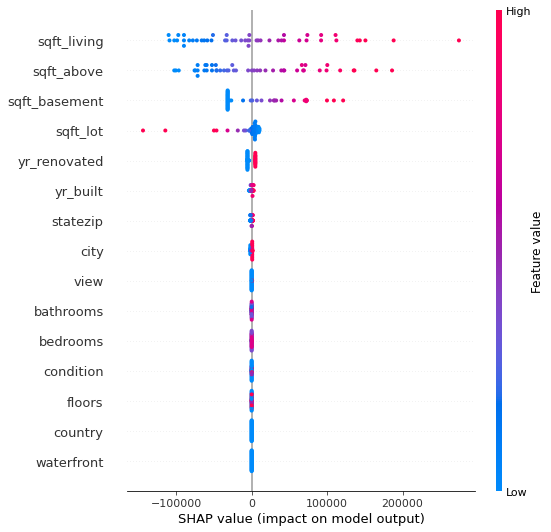

In [ ]:
shap.summary_plot(shap_values)

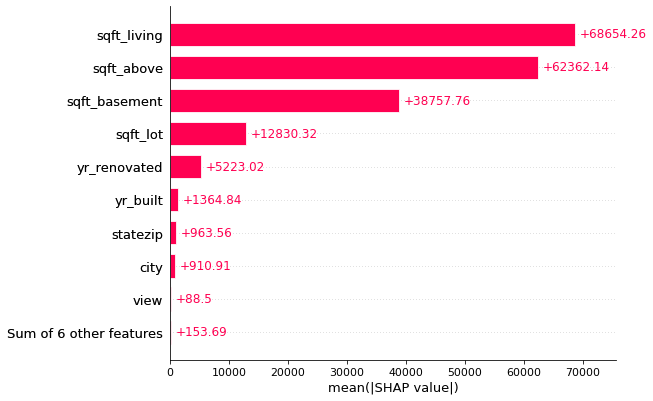

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

Exception: ignored

In [63]:
shap.initjs()
shap.plots.force(shap_values[0])

In [64]:
shap.initjs()
shap.plots.force(shap_values[5])

In [65]:
shap.initjs()
shap.plots.force(shap_values[7])

### Linear Explainer

**Working:** 

**Not Working:** 

In [ ]:
regressor

In [ ]:
explainer = shap.LinearExplainer(regressor, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

In [211]:
model_idx = 3

regressor_list = [regressor_lin, regressor_knn, regressor_rf, regressor_xgb, regressor_lgbm, regressor_ANN]
regressor = regressor_list[model_idx]

### Kernel Explainer

**Working:** 

**Not Working:** 

In [212]:
regressor

XGBRegressor()

In [219]:
explainer = shap.KernelExplainer(regressor.predict, x_train.values)

Provided model function fails when applied to the provided data set.


ValueError: ignored

In [ ]:
shap_values = explainer.shap_values(x_test.iloc[:10,:])

In [ ]:
explainer = shap.KernelExplainer(regressor.predict, x_train.iloc[:100,:])
shap_values = explainer.shap_values(x_test.iloc[:10,:])

In [ ]:
shap.summary_plot(shap_values, x_test.iloc[:10,:])

In [ ]:
test_instance = 0

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[test_instance], x_test.iloc[0,:])

#### For ANN

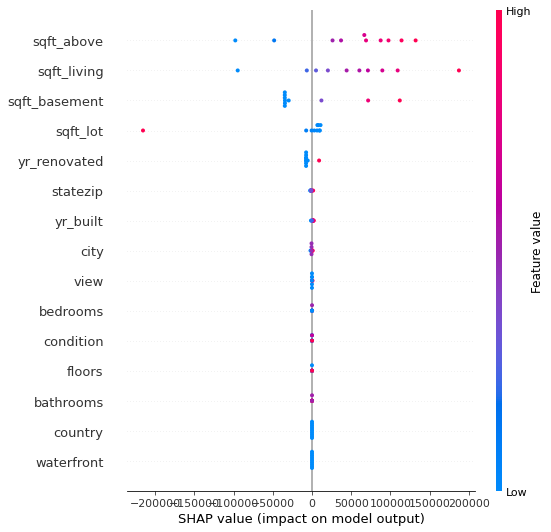

In [209]:
shap.summary_plot(shap_values[0], x_test.iloc[:10,:])

In [210]:
test_instance = 0

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0][test_instance], x_test.iloc[0,:])

### Tree Explainer

**Working:** 

**Not Working:** 

In [ ]:
regressor

In [ ]:
explainer = shap.TreeExplainer(regressor, x_train)
shap_values = explainer(x_test)

InvalidModelError: ignored

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

### Deep Explainer

**Only for NN** 

In [89]:
explainer = shap.DeepExplainer(regressor_ANN, x_train.iloc[:50,:].values)
shap_values = explainer.shap_values(x_test.iloc[:10].values, check_additivity=False)

In [94]:
np.array(shap_values).shape

(1, 10, 15)

In [107]:
shap_values[0][0]

array([-2.84487989e+01,  3.92792258e+01, -1.15497168e+05,  7.29133833e+02,
       -3.48164081e+01,  0.00000000e+00, -8.32876611e+01, -3.58273308e+01,
       -1.13355600e+05,  1.61007108e+03,  1.61799056e+03, -4.90753658e+03,
       -5.94855153e+02, -1.19535988e+03,  0.00000000e+00])

In [98]:
shap_values

[array([[-2.84487989e+01,  3.92792258e+01, -1.15497168e+05,
          7.29133833e+02, -3.48164081e+01,  0.00000000e+00,
         -8.32876611e+01, -3.58273308e+01, -1.13355600e+05,
          1.61007108e+03,  1.61799056e+03, -4.90753658e+03,
         -5.94855153e+02, -1.19535988e+03,  0.00000000e+00],
        [-2.84751196e+01,  1.78121277e+01, -2.89791946e+04,
          9.47451372e+03,  3.75816837e+01,  0.00000000e+00,
         -8.32876611e+01,  3.29645582e+01,  1.58063042e+04,
         -4.56845875e+04,  1.16749187e+03, -4.90753658e+03,
         -5.94699033e+02, -7.86484308e+02,  0.00000000e+00],
        [ 2.61647494e+01,  6.10232623e+01,  1.62319113e+05,
          6.01882563e+03, -3.48588162e+01,  0.00000000e+00,
          5.55160009e+02,  1.01805706e+02,  5.82795944e+04,
          1.02917540e+05,  6.88524070e+01, -4.90753658e+03,
         -1.75546980e+03, -1.86647241e+03,  0.00000000e+00],
        [-2.46614864e+01,  1.47114046e+01,  2.67834714e+04,
         -1.01222745e+05,  3.26129206

In [95]:
x_train.shape

(4559, 15)

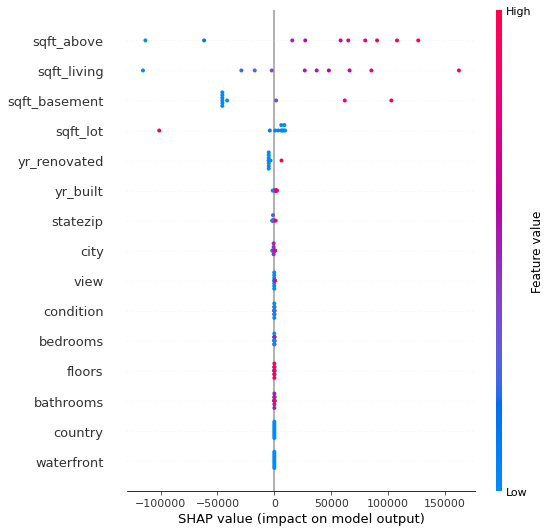

In [92]:
shap.summary_plot(shap_values[0], x_test[:10])

In [150]:
base_val = float(np.array(explainer.expected_value[0]))
base_val

629203.625

In [151]:
test_instance = 0

shap.initjs()
shap.force_plot(base_val, shap_values[0][test_instance])

## Lime Tabular Explainer

**Working:** LogisticRegression, RandomForestClassifier, LGBMClassifier, ANN

**Not Working:** XGBClassifier

In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data = np.array(x_train),
    feature_names = x_train.columns,
    categorical_features=categorical_features,
    categorical_names=categorical_names,
    mode = 'regression',
    kernel_width=3
)

In [ ]:
x_test.iloc[0]

bedrooms             3.00
bathrooms            2.75
sqft_living       1300.00
sqft_lot         14197.00
floors               1.00
waterfront           0.00
view                 0.00
condition            3.00
sqft_above         860.00
sqft_basement      440.00
yr_built          1996.00
yr_renovated         0.00
city                18.00
statezip            18.00
country              0.00
Name: 3647, dtype: float64

In [ ]:
regressor

KNeighborsRegressor(n_neighbors=2)

In [ ]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[0], ##new data
    predict_fn=regressor.predict
)

exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('sqft_living <= 1460.00', -171377.1778066313),
 ('waterfront <= 0.00', 142453.40215255163),
 ('sqft_above <= 1190.00', -95315.36618645427),
 ('sqft_lot > 10961.00', -54083.67955183034),
 ('statezip=WA 98030', -24983.39776544271),
 ('city=Kent', -16817.56715153034),
 ('floors <= 1.00', 16551.66833179884),
 ('0.00 < sqft_basement <= 605.00', 14880.753736661742),
 ('yr_renovated <= 0.00', -14287.491638131269),
 ('view <= 0.00', -13804.617320768493)]

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred[0])
print(max(y_pred))
print(min(y_pred))

327440.0
1220000.0
314950.0


In [ ]:
y_test.iloc[0]

245000.0